# 1.) Import the data from CCLE into a new Google Colab file

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [113]:
df = pd.read_csv('/content/gdrive/MyDrive/insurance.csv')

In [114]:
# Convert sex to 2 values: 0 and 1
df.loc[df["sex"]=='female','sex'] = 1
df.loc[df["sex"]=='male','sex'] = 0

# Convert smoke
df.loc[df["smoker"]=='yes','smoker'] = 1
df.loc[df["smoker"]=='no','smoker'] = 0

# Convert region
# region1: southwest
df['region1'] = df['region']
df.loc[df['region1'] == 'southwest', 'region1'] = 1
df.loc[df['region1'] == 'northwest', 'region1'] = 0
df.loc[df['region1'] == 'southeast', 'region1'] = 0
df.loc[df['region1'] == 'northeast', 'region1'] = 0
# region2: northwest
df['region2'] = df['region']
df.loc[df['region2'] == 'southwest', 'region2'] = 0
df.loc[df['region2'] == 'northwest', 'region2'] = 1
df.loc[df['region2'] == 'southeast', 'region2'] = 0
df.loc[df['region2'] == 'northeast', 'region2'] = 0
# region3: southeast
df['region3'] = df['region']
df.loc[df['region3'] == 'southwest', 'region3'] = 0
df.loc[df['region3'] == 'northwest', 'region3'] = 0
df.loc[df['region3'] == 'southeast', 'region3'] = 1
df.loc[df['region3'] == 'northeast', 'region3'] = 0
# region4: northeast
df['region4'] = df['region']
df.loc[df['region4'] == 'southwest', 'region4'] = 0
df.loc[df['region4'] == 'northwest', 'region4'] = 0
df.loc[df['region4'] == 'southeast', 'region4'] = 0
df.loc[df['region4'] == 'northeast', 'region4'] = 1


In [115]:
df

,age,sex,bmi,children,smoker,region,charges,region1,region2,region3,region4
0,19,1,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,northeast,2205.98080,0,0,0,1
1335,18,1,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,southwest,2007.94500,1,0,0,0


# 2.) Split the data into 80/20, in/out sample

In [87]:
import numpy as np

In [116]:
df2 = df[['age','sex','bmi','children','smoker','region1','region2','region3']]

In [117]:
data = np.array(df2)
target = np.array(df.iloc[:,-5:-4])

In [118]:
data

array([[19, 1, 27.9, ..., 1, 0, 0],
       [18, 0, 33.77, ..., 0, 0, 1],
       [28, 0, 33.0, ..., 0, 0, 1],
       ...,
       [18, 1, 36.85, ..., 0, 0, 1],
       [21, 1, 25.8, ..., 1, 0, 0],
       [61, 1, 29.07, ..., 0, 1, 0]], dtype=object)

In [120]:
cut = int((len(data) * .8) //1)

In [123]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]


# 3.) Normalize the Data

In [57]:
from sklearn import preprocessing

In [124]:
# Preprocessing
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, ...,  1.76504522,
        -0.55791981, -0.6155209 ],
       [-1.52464584, -0.97964634,  0.4911621 , ..., -0.56655772,
        -0.55791981,  1.6246402 ],
       [-0.81719959, -0.97964634,  0.36455128, ..., -0.56655772,
        -0.55791981,  1.6246402 ],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, ..., -0.56655772,
        -0.55791981, -0.6155209 ],
       [ 1.65886228, -0.97964634, -1.50008089, ..., -0.56655772,
         1.79237229, -0.6155209 ],
       [ 1.02216066,  1.02077653,  0.18367867, ..., -0.56655772,
        -0.55791981,  1.6246402 ]])

In [125]:
out_data_scale = scaler.transform(out_data)
out_data_scale

array([[-0.18049797, -0.97964634,  1.03377993, ..., -0.56655772,
        -0.55791981,  1.6246402 ],
       [ 1.65886228, -0.97964634,  0.10886318, ..., -0.56655772,
        -0.55791981, -0.6155209 ],
       [-1.31241197, -0.97964634,  0.07762155, ..., -0.56655772,
         1.79237229, -0.6155209 ],
       ...,
       [-1.52464584,  1.02077653,  0.99760541, ..., -0.56655772,
        -0.55791981,  1.6246402 ],
       [-1.31241197,  1.02077653, -0.81934216, ...,  1.76504522,
        -0.55791981, -0.6155209 ],
       [ 1.51737303,  1.02077653, -0.28165722, ..., -0.56655772,
         1.79237229, -0.6155209 ]])

# 4.) Get lambda from Lasso cross validation

In [42]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [126]:
modCV = LassoCV().fit(in_data_scale, in_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
a = modCV.alpha_ #Optimized Lambda

In [128]:
a

115.9799859390741

# 5.) Run a lambda regression with that Lambda

In [129]:
reg = Lasso(alpha = a).fit(in_data_scale,in_target)
reg.predict(np.array(in_data_scale))
reg.coef_

array([3580.35805206,    0.        , 1897.42890992,  415.06890389,
       9345.10115447, -238.7634887 ,   -0.        , -158.68185954])

# 6.) Visualize the coefficients 

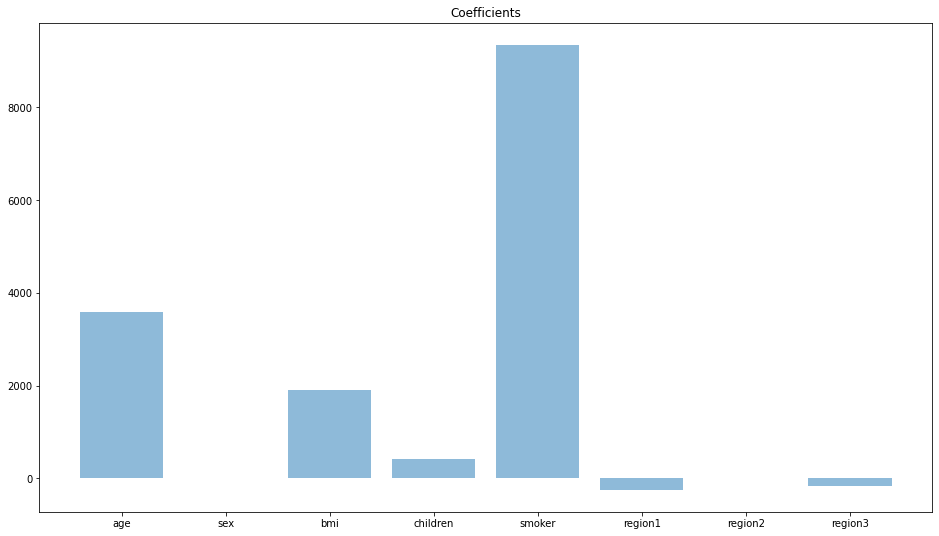

In [130]:
objects = ('age','sex','bmi','children','smoker','region1','region2','region3')
y_val = np.arange(len(objects))
plt.figure(figsize=(16, 9))
plt.bar(y_val, reg.coef_, align='center', alpha=0.5)
plt.xticks(y_val,objects)
plt.title('Coefficients')
plt.show()

# 7.) Interpret the coefficients

Sex and region2(northwest) seem to have little impact on the charges of insurance. Whether or not the person is a smoker significantly determines the charges of insurance. Age and BMI have a fairly considerate impact. Children, region1 and region3 have a relative small impact on the charges of insurance. 

# 8.) Compare in and out of sample MSE’s

In [131]:
pre_in = reg.predict(np.array(in_data_scale))
pre_out = reg.predict(np.array(out_data_scale))


In [133]:
from sklearn.metrics import mean_squared_error
out_MSE = mean_squared_error(pre_out, out_target)
in_MSE = mean_squared_error(pre_in, in_target)

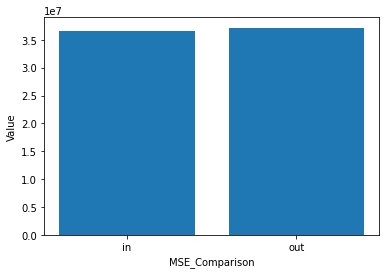

In [135]:
plt.bar(['in', 'out'], [in_MSE, out_MSE])
plt.xlabel('MSE_Comparison')
plt.ylabel('Value')
plt.show()

# They have very similar MSE. 